In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [13]:

# Wczytywanie danych z plików CSV
ace_data = pd.read_csv('../data/transformed/ace_reconnection_periods.csv')
dscov_data = pd.read_csv('../data/transformed/dscov_reconnection_periods.csv')
wind_data = pd.read_csv('../data/transformed/wind_reconnection_periods.csv')


In [3]:
# Grupowanie danych według roku i zliczanie liczby zdarzeń dla każdego satelity
ace_counts = ace_data.groupby('Year').size()
dscov_counts = dscov_data.groupby('Year').size()
wind_counts = wind_data.groupby('Year').size()

# Łączenie danych w jeden DataFrame
event_counts = pd.DataFrame({
    'ACE': ace_counts,
    'DSCOVR': dscov_counts,
    'WIND': wind_counts
})

event_counts.fillna(0, inplace=True)  # Zamiana NaN na 0
event_counts = event_counts.astype(int)  # Konwersja wartości na liczby całkowite

event_counts


,ACE,DSCOVR,WIND
Year,,,
1995,0,0,463
1996,0,0,207
1997,0,0,433
1998,453,0,1182
1999,490,0,1031
2000,1249,0,1540
2001,901,0,1505
2002,719,0,1066
2003,824,0,795


In [4]:
# Przekształcenie kolumny "Datetime" w każdym zbiorze danych na format daty i czasu
ace_data['Datetime'] = pd.to_datetime(ace_data['Datetime'])
dscov_data['Datetime'] = pd.to_datetime(dscov_data['Datetime'])
wind_data['Datetime'] = pd.to_datetime(wind_data['Datetime'])

# Definicja funkcji do sprawdzania pokrycia się zdarzeń w określonym przedziale czasu
def overlapping_events(main_data, compare_data, time_delta=pd.Timedelta(minutes=5)):

    overlap_count = 0
    for dt in main_data['Datetime']:
        # Sprawdzenie, czy istnieją zdarzenia w compare_data w określonym przedziale czasu
        matching_events = compare_data[
            (compare_data['Datetime'] >= dt - time_delta) &
            (compare_data['Datetime'] <= dt + time_delta)
        ]
        if len(matching_events) > 0:
            overlap_count += 1
    return overlap_count

# Obliczenie liczby pokrywających się zdarzeń dla różnych kombinacji satelitów
ace_dscov_overlap = overlapping_events(ace_data, dscov_data)
ace_wind_overlap = overlapping_events(ace_data, wind_data)
dscov_wind_overlap = overlapping_events(dscov_data, wind_data)

ace_dscov_overlap, ace_wind_overlap, dscov_wind_overlap


(0, 4481, 128)

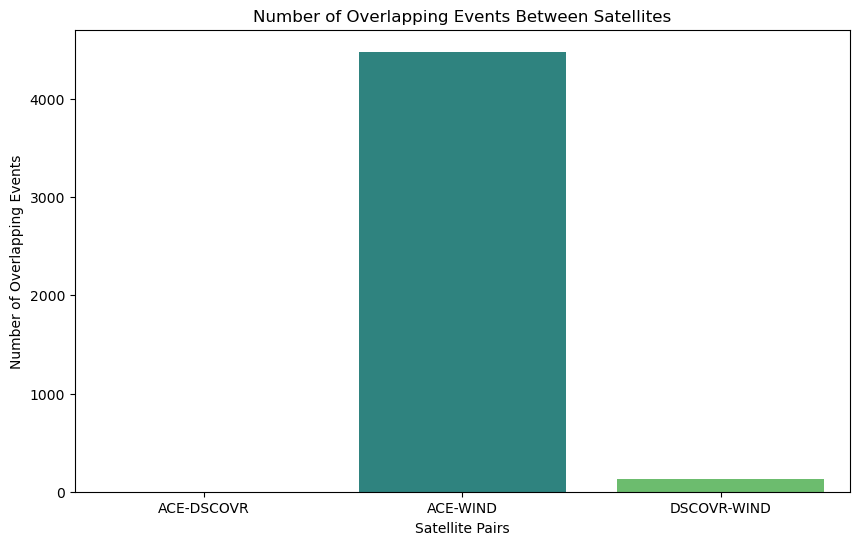

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tworzenie DataFrame dla heatmapy
overlap_data = pd.DataFrame({
    'Satellites': ['ACE-DSCOVR', 'ACE-WIND', 'DSCOVR-WIND'],
    'Overlap_Count': [ace_dscov_overlap, ace_wind_overlap, dscov_wind_overlap]
})

# Rysowanie heatmapy
plt.figure(figsize=(10, 6))
sns.barplot(x='Satellites', y='Overlap_Count', data=overlap_data, palette='viridis')
plt.title('Number of Overlapping Events Between Satellites')
plt.ylabel('Number of Overlapping Events')
plt.xlabel('Satellite Pairs')
plt.show()

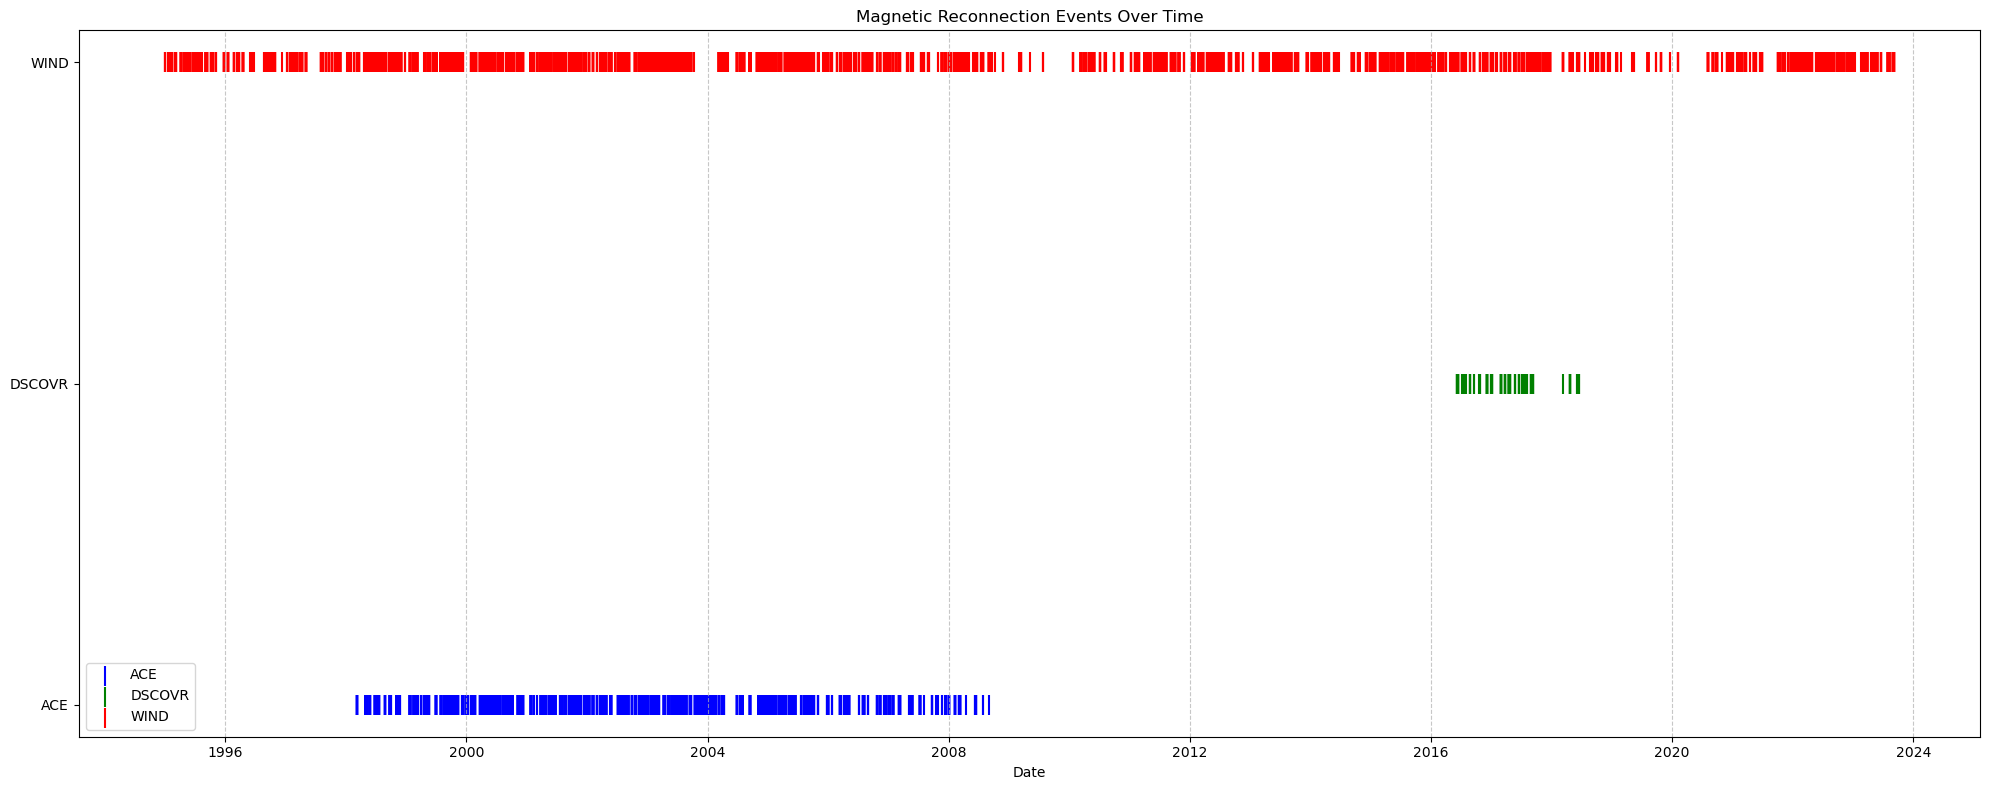

In [6]:
# Rysowanie wykresu z momentami rekoneksji magnetycznej
plt.figure(figsize=(20, 8))

# Zaznaczenie momentów rekoneksji dla każdego satelity
plt.scatter(ace_data['Datetime'], [1] * len(ace_data), label='ACE', color='blue', marker='|', s=200)
plt.scatter(dscov_data['Datetime'], [2] * len(dscov_data), label='DSCOVR', color='green', marker='|', s=200)
plt.scatter(wind_data['Datetime'], [3] * len(wind_data), label='WIND', color='red', marker='|', s=200)

plt.yticks([1, 2, 3], ['ACE', 'DSCOVR', 'WIND'])
plt.xlabel('Date')
plt.title('Magnetic Reconnection Events Over Time')
plt.legend()
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


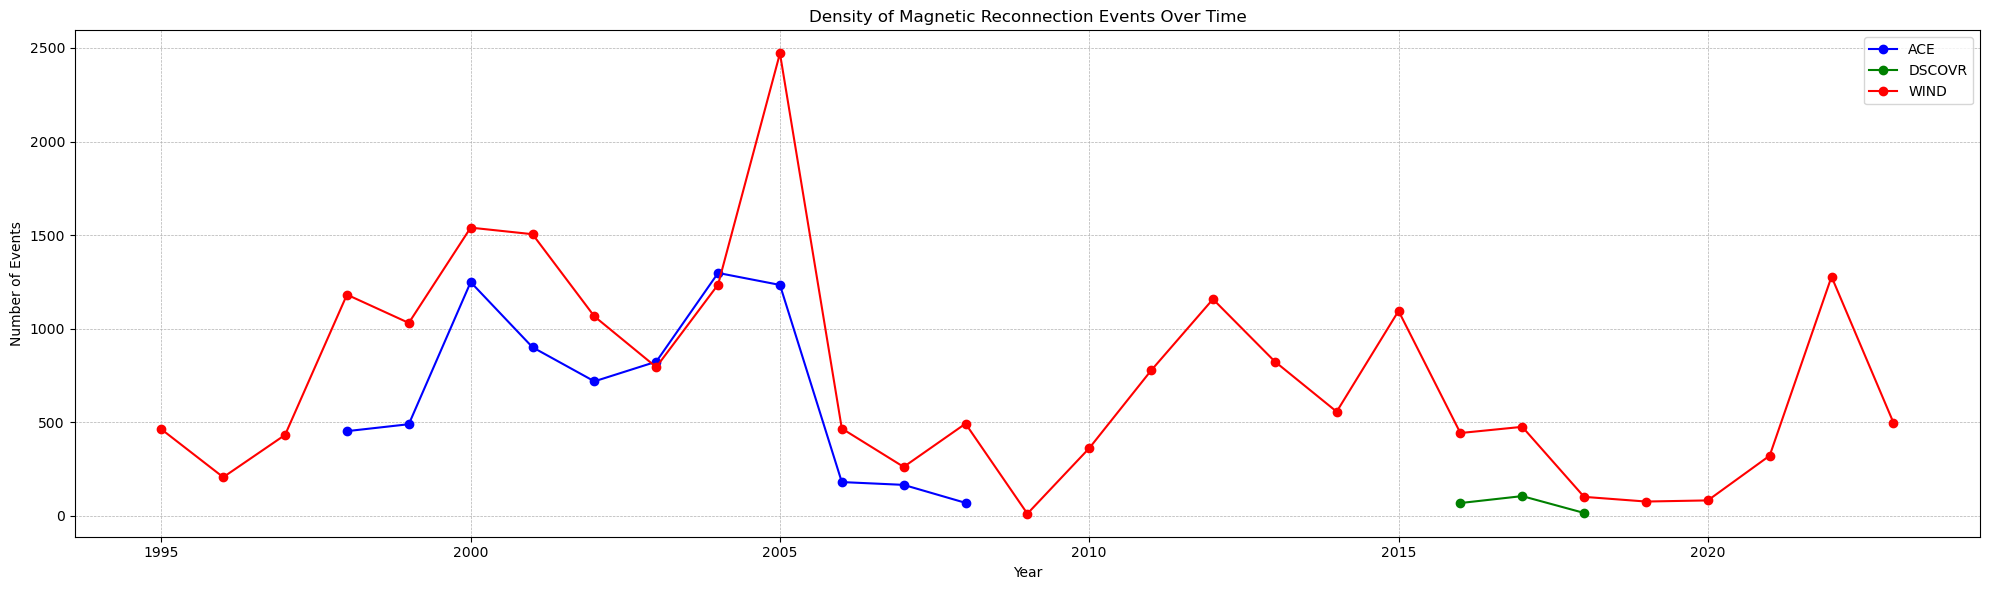

In [7]:
# Rysowanie histogramu gęstości zdarzeń w czasie
plt.figure(figsize=(20, 6))

# Zliczanie zdarzeń dla każdego roku i satelity
ace_years = ace_data['Year'].value_counts().sort_index()
dscov_years = dscov_data['Year'].value_counts().sort_index()
wind_years = wind_data['Year'].value_counts().sort_index()

# Rysowanie danych dla każdego satelity
plt.plot(ace_years.index, ace_years.values, marker='o', label='ACE', color='blue')
plt.plot(dscov_years.index, dscov_years.values, marker='o', label='DSCOVR', color='green')
plt.plot(wind_years.index, wind_years.values, marker='o', label='WIND', color='red')

plt.title('Density of Magnetic Reconnection Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


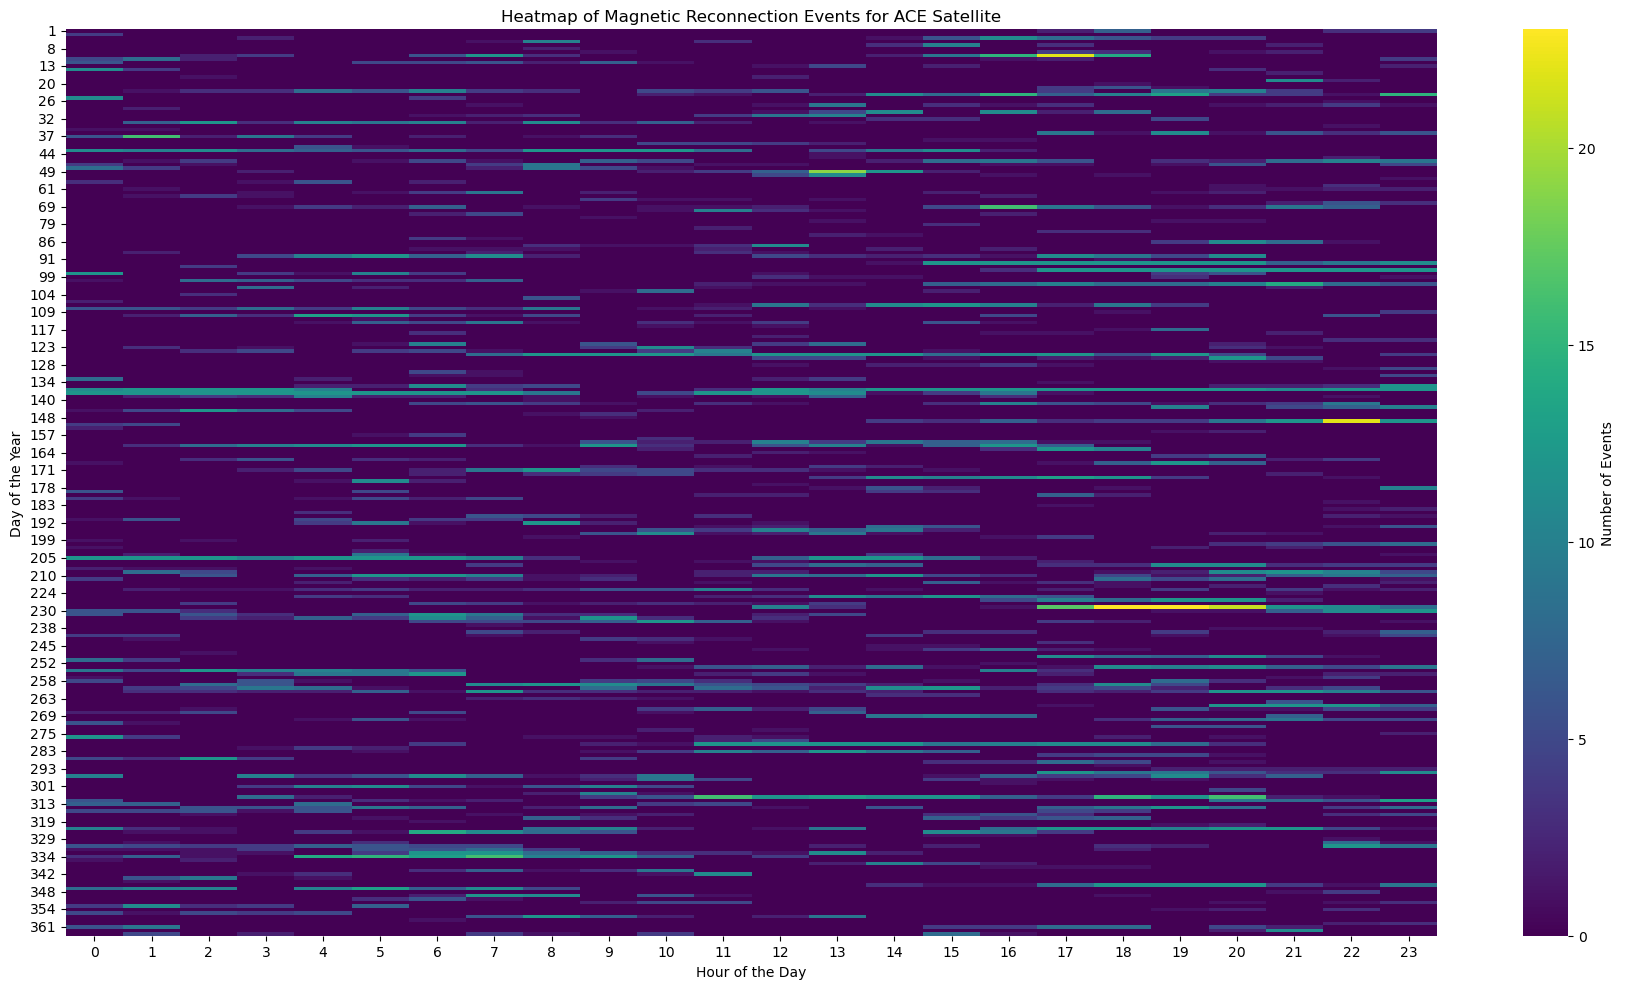

In [8]:
# Tworzenie mapy ciepła dla zdarzeń w zależności od dnia roku i godziny dnia dla satelity ACE
heatmap_data = ace_data.groupby([ace_data['Datetime'].dt.dayofyear, ace_data['Datetime'].dt.hour]).size().unstack().fillna(0)

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Events'})
plt.title('Heatmap of Magnetic Reconnection Events for ACE Satellite')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Year')
plt.tight_layout()
plt.show()


In [22]:
import plotly.graph_objects as go
import pandas as pd



# Konwersja kolumny 'Datetime' do formatu datetime
ace_data['Datetime'] = pd.to_datetime(ace_data['Datetime'])
dscov_data['Datetime'] = pd.to_datetime(dscov_data['Datetime'])
wind_data['Datetime'] = pd.to_datetime(wind_data['Datetime'])
# 1. Gęstość zdarzeń w czasie
ace_years = ace_data['Year'].value_counts().sort_index()
dscov_years = dscov_data['Year'].value_counts().sort_index()
wind_years = wind_data['Year'].value_counts().sort_index()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ace_years.index, y=ace_years.values, mode='lines+markers', name='ACE'))
fig1.add_trace(go.Scatter(x=dscov_years.index, y=dscov_years.values, mode='lines+markers', name='DSCOVR'))
fig1.add_trace(go.Scatter(x=wind_years.index, y=wind_years.values, mode='lines+markers', name='WIND'))
fig1.update_layout(title='Density of Magnetic Reconnection Events Over Time', xaxis_title='Year', yaxis_title='Number of Events')

# 2. Korelacja między wskaźnikami
import plotly.express as px
fig2 = px.scatter_matrix(ace_data, dimensions=["CP/MV_Flag", "Abs_Vx_Velocity_kms_GSE", "Proton_Density_Present"], title='Correlation Between Key Indicators for ACE Satellite')

# 3. Mapa ciepła zdarzeń
heatmap_data = ace_data.groupby([ace_data['Datetime'].dt.dayofyear, ace_data['Datetime'].dt.hour]).size().unstack().fillna(0)
fig3 = px.imshow(heatmap_data, labels=dict(x="Hour of the Day", y="Day of the Year", color="Number of Events"), title='Heatmap of Magnetic Reconnection Events for ACE Satellite')

# 4. Analiza skupień (uwzględniając PCA dla wizualizacji)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cluster_data = ace_data[["CP/MV_Flag", "Abs_Vx_Velocity_kms_GSE", "Proton_Density_Present"]].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(scaled_data)

fig4 = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color=clusters, color_continuous_scale='viridis', title='Clusters of Magnetic Reconnection Events for ACE Satellite')

# 5. Wykres wiatrowy
wind_data_ace = ace_data[['Datetime', 'Abs_Vx_Velocity_kms_GSE']].dropna()
fig5 = px.line(wind_data_ace, x='Datetime', y='Abs_Vx_Velocity_kms_GSE', title='Solar Wind Velocity Over Time for ACE Satellite')
fig5.update_traces(line=dict(width=0.5, color='blue'), selector=dict(mode='lines+markers'))

# Wyświetlenie wykresów



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7eff1020dcf0>
Traceback (most recent call last):
  File "/home/data/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/data/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/data/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/data/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

In [19]:
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()